In [1]:
%load_ext autoreload
%autoreload 2
import warnings

import numpy as np

from bounce.bounce_model import BounceModel
from bounce.model_shooter import ModelShooter
from gelfand_yaglom.large_l_solver import LargeLSolver
from model_specific.constant_storage import ConstantStorage
from model_specific.potential import Potential

# Bounce Solution

First set the model parameters, define the potential.

In [2]:
constants = ConstantStorage(beta=45, epsilon=0.046, l=8, s_disturbance=1)
potential = Potential(0.25, constants)

Define the model for the bounce solution.

In [3]:
model = BounceModel(tw=1, potential=potential, tol=1e-5, t_granularity=10000)

Apply the shooting method and save the solution.

100% (100 of 100) |######################| Elapsed Time: 0:00:01 Time:  0:00:01



Iteration limit reached!
Final precision: 6.854818321955225e-05

last time: 3.141582653589793
3.141582653589793


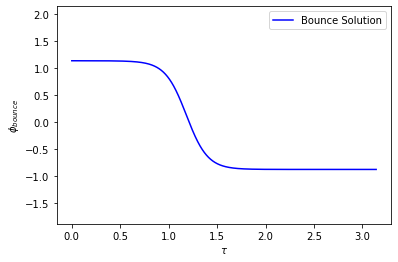

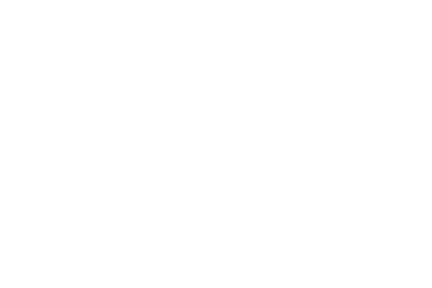

In [4]:
model_shooter = ModelShooter(model, potential, max_steps=100, required_precision=1e-7)

bounce_solution = model_shooter.shoot_model()
bounce_solution.plot_solution()

# Fluctuation Operator
Define the parameter space

In [5]:
large_l_solver = LargeLSolver(bounce_solution, potential, constants, min_l=2, max_l=120, load_dets=False,
                              recalculate_vacuum_fluctuation=False)

Solve the fluctuation operator for all parameters.

In [7]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    large_l_solver.multiprocess_det_ratio()
large_l_solver.save_det()

######################################################################################################################
######################################################################################################################CPU times: user 1.68 s, sys: 471 ms, total: 2.15 s
Wall time: 41min 34s


Extrapolate the solution set for every $\ell$ parameter to initial time $\tau_{0} = 0$.

In [8]:
optimized_large_l_solver = large_l_solver.extrapolate_convergence_points_over_starting_time()

Plot $T^{(\ell)} \left(\tau = \tau_{max} \approx \pi \right)$ over $\ell$, together with the analytical counter terms.

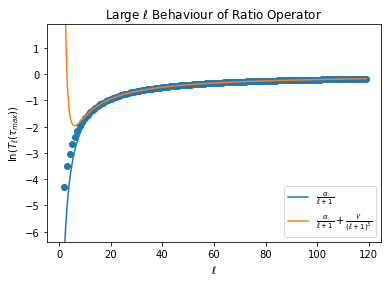

In [9]:
optimized_large_l_solver.plot_dets()

Plot the full, renormalized determinant $$\frac{1}{2} \sum_{\ell} \left( \ell + 1 \right)^2 \left(T^{(\ell)} \left
(\tau =
\tau_{max} \approx \pi
\right) - C.T. \right)$$

First, we plot the full sum over the $\ell$ cutoff without the extrapolation of the initial times $\tau_{0}
\rightarrow 0$

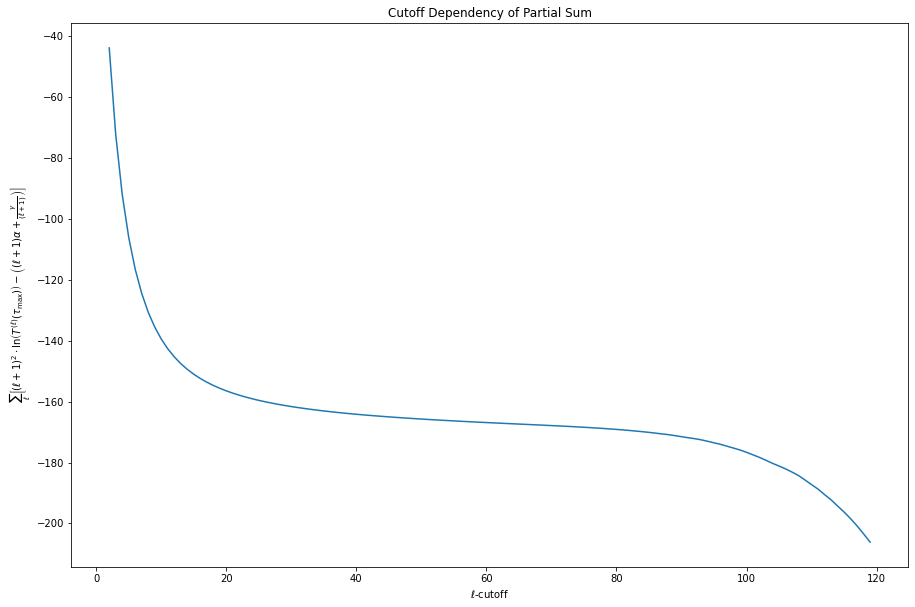

In [10]:
large_l_solver.plot_partial_sums()

Now we plot the cutoff dependency of the full sum for with the the extrapolated initial times.

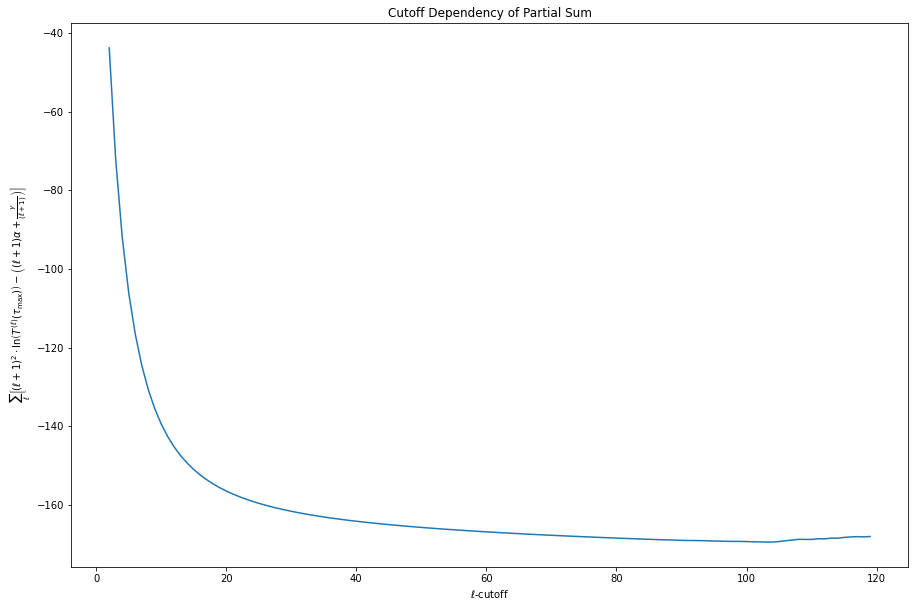

In [11]:
optimized_large_l_solver.plot_partial_sums()